In [4]:
import os, sys
from pathlib import Path

ENV_BIN = str(Path(sys.executable).resolve().parent)  # .../envs/oxe/bin
os.environ["PATH"] = ENV_BIN + ":" + os.environ.get("PATH", "")

print("ENV_BIN:", ENV_BIN)
print("gsutil which:", os.popen("which gsutil").read().strip())


ENV_BIN: /ibex/project/c2320/dataset-check/x-embodiment/envs/oxe/bin
gsutil which: /ibex/project/c2320/dataset-check/x-embodiment/envs/oxe/bin/gsutil


In [5]:
import os, sys
print("Python executable:", sys.executable)
print("PATH:")
print(os.environ["PATH"])

Python executable: /ibex/project/c2320/dataset-check/x-embodiment/envs/oxe/bin/python
PATH:
/ibex/project/c2320/dataset-check/x-embodiment/envs/oxe/bin:/sw/rl9g/machine_learning/2024.01/rl9_cudnn8_cuda11.8_py3.9_env/machine_learning-module/env/bin:/sw/rl9g/cuda/11.8/rl9_binary/bin:/sw/rl9g/gcc/13.2.0/rl9_binary//bin:/opt/slurm/puppet/bin:/opt/slurm/cluster/ibex/install-v2/RedHat-9/bin:/opt/slurm/scripts/bin:/usr/lpp/mmfs/bin:/ibex/user/x_mohameta/conda-environments/oxe-jupyter/bin:/ibex/user/x_mohameta/miniforge/condabin:/home/x_mohameta/.local/bin:/home/x_mohameta/bin:/opt/slurm/puppet/bin:/usr/share/Modules/bin:/opt/slurm/cluster/ibex/install-v2/RedHat-9/bin:/opt/slurm/scripts/bin:/usr/lpp/mmfs/bin:/usr/local/bin:/usr/bin:/usr/local/sbin:/usr/sbin:/opt/slurm/scripts/bin:/opt/puppetlabs/bin:/opt/slurm/scripts/bin


In [6]:
# === 0) Imports + TFDS data dir ===
import os
import subprocess
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
import tensorflow as tf
from PIL import Image

TFDS_DATA_DIR = os.path.expanduser("~/tensorflow_datasets")
os.makedirs(TFDS_DATA_DIR, exist_ok=True)

print("TFDS_DATA_DIR =", TFDS_DATA_DIR)


TFDS_DATA_DIR = /home/x_mohameta/tensorflow_datasets


In [7]:
import subprocess
print(
    subprocess.run(
        ["gsutil", "ls", "gs://gdm-robotics-open-x-embodiment/"],
        stdout=subprocess.PIPE,
        stderr=subprocess.STDOUT,
        text=True
    ).stdout[:500]
)


gs://gdm-robotics-open-x-embodiment/agent_aware_affordances_$folder$
gs://gdm-robotics-open-x-embodiment/asu_table_top_converted_externally_to_rlds_$folder$
gs://gdm-robotics-open-x-embodiment/austin_buds_dataset_converted_externally_to_rlds_$folder$
gs://gdm-robotics-open-x-embodiment/austin_sailor_dataset_converted_externally_to_rlds_$folder$
gs://gdm-robotics-open-x-embodiment/austin_sirius_dataset_converted_externally_to_rlds_$folder$
gs://gdm-robotics-open-x-embodiment/bc_z_$folder$
gs://gd


In [16]:
# === 1) Get the official dataset list (from the spreadsheet) ===
# Spreadsheet: https://docs.google.com/spreadsheets/d/1rPBD77tk60AEIGZrGSODwyyzs5FgCU9Uz3h-3_t2A9g/edit  :contentReference[oaicite:2]{index=2}
#
# Easiest: pick from the "Dataset Download List" shown in the sheet.
# Example dataset names include: 'bridge', 'kuka', 'droid', ...
import os
from pathlib import Path

def pick_cache_root() -> Path:
    # prefer HF_HOME, then HF_DATASETS_CACHE, else current working directory
    for var in ("HF_HOME", "HF_DATASETS_CACHE"):
        v = os.environ.get(var)
        if v:
            return Path(v).expanduser().resolve()
    return Path.cwd().resolve()

CACHE_ROOT = pick_cache_root()
DATASET = "kuka"  # change me

# Put all our OXE sampling artifacts under that cache root
OUT_DIR = CACHE_ROOT / "oxe_peek" / DATASET
OUT_DIR.mkdir(parents=True, exist_ok=True)

print("CACHE_ROOT =", CACHE_ROOT)
print("OUT_DIR     =", OUT_DIR)


CACHE_ROOT = /ibex/project/c2320/dataset-check/huggingface
OUT_DIR     = /ibex/project/c2320/dataset-check/huggingface/oxe_peek/kuka


In [18]:
out = gsutil('ls -r "gs://gdm-robotics-open-x-embodiment/kuka/"')
lines = [ln.strip() for ln in out.splitlines() if ln.strip().startswith("gs://")]

print("Total listed under kuka/:", len(lines))
print("First 50:\n", "\n".join(lines[:50]))

# Filter anything containing 0.1.0 (folder markers or real files)
v = [ln for ln in lines if "0.1.0" in ln]
print("\nContains '0.1.0':", len(v))
print("\n".join(v[:50]))



Total listed under kuka/: 1022
First 50:
 gs://gdm-robotics-open-x-embodiment/kuka/:
gs://gdm-robotics-open-x-embodiment/kuka/0.1.0_$folder$
gs://gdm-robotics-open-x-embodiment/kuka/0.1.0/:
gs://gdm-robotics-open-x-embodiment/kuka/0.1.0/dataset_info.json
gs://gdm-robotics-open-x-embodiment/kuka/0.1.0/features.json
gs://gdm-robotics-open-x-embodiment/kuka/0.1.0/kuka-train.tfrecord-00000-of-01024
gs://gdm-robotics-open-x-embodiment/kuka/0.1.0/kuka-train.tfrecord-00001-of-01024
gs://gdm-robotics-open-x-embodiment/kuka/0.1.0/kuka-train.tfrecord-00002-of-01024
gs://gdm-robotics-open-x-embodiment/kuka/0.1.0/kuka-train.tfrecord-00003-of-01024
gs://gdm-robotics-open-x-embodiment/kuka/0.1.0/kuka-train.tfrecord-00004-of-01024
gs://gdm-robotics-open-x-embodiment/kuka/0.1.0/kuka-train.tfrecord-00005-of-01024
gs://gdm-robotics-open-x-embodiment/kuka/0.1.0/kuka-train.tfrecord-00006-of-01024
gs://gdm-robotics-open-x-embodiment/kuka/0.1.0/kuka-train.tfrecord-00007-of-01024
gs://gdm-robotics-open-x-emb

In [19]:
import re

# list top-level entries
root = gsutil('ls "gs://gdm-robotics-open-x-embodiment/" | head -n 80')
entries = [ln.strip() for ln in root.splitlines() if ln.strip().startswith("gs://")]

# normalize "$folder$" markers -> dataset names
def normalize(name):
    name = name.rstrip("/")
    name = name.split("/")[-1]
    return name.replace("_$folder$", "")

candidates = [normalize(e) for e in entries if e.endswith("_$folder$")]
print("Top-level candidates:", candidates[:20])

def has_real_objects(dsname, max_lines=2000):
    out = gsutil(f'ls -r "gs://gdm-robotics-open-x-embodiment/{dsname}/"')
    lines = [ln.strip() for ln in out.splitlines() if ln.strip().startswith("gs://")]
    # real objects are those that are not folder markers and not the "dsname/:" line
    real = [ln for ln in lines if (not ln.endswith("_$folder$")) and (not ln.endswith(f"/{dsname}/:"))]
    return len(real), real[:10]

found = []
for ds in candidates[:30]:  # scan first 30 quickly
    try:
        n_real, examples = has_real_objects(ds)
        if n_real > 0:
            found.append((ds, n_real, examples))
    except Exception as e:
        pass

print("\nDatasets with real objects (first scan):", len(found))
for ds, n, ex in found[:10]:
    print(f"\n- {ds}: real_objects={n}")
    print("\n".join(ex))


Top-level candidates: ['agent_aware_affordances', 'asu_table_top_converted_externally_to_rlds', 'austin_buds_dataset_converted_externally_to_rlds', 'austin_sailor_dataset_converted_externally_to_rlds', 'austin_sirius_dataset_converted_externally_to_rlds', 'bc_z', 'berkeley_autolab_ur5', 'berkeley_cable_routing', 'berkeley_fanuc_manipulation', 'berkeley_gnm_cory_hall', 'berkeley_gnm_recon', 'berkeley_gnm_sac_son', 'berkeley_mvp_converted_externally_to_rlds', 'berkeley_rpt_converted_externally_to_rlds', 'bridge', 'cmu_franka_exploration_dataset_converted_externally_to_rlds', 'cmu_play_fusion', 'cmu_playing_with_food', 'cmu_stretch', 'columbia_cairlab_pusht_real']

Datasets with real objects (first scan): 19

- agent_aware_affordances: real_objects=66
gs://gdm-robotics-open-x-embodiment/agent_aware_affordances/1.0.0/:
gs://gdm-robotics-open-x-embodiment/agent_aware_affordances/1.0.0/agent_aware_affordances_v2-train.tfrecord-00000-of-00064
gs://gdm-robotics-open-x-embodiment/agent_aware_af

In [20]:
DATASET = found[0][0]   # pick first dataset that has real files
print("Using DATASET =", DATASET)


Using DATASET = agent_aware_affordances


In [21]:
out = gsutil(f'ls -r "gs://gdm-robotics-open-x-embodiment/{DATASET}/"')
lines = [ln.strip() for ln in out.splitlines() if ln.strip().startswith("gs://")]
real = [ln for ln in lines if not ln.endswith("_$folder$") and not ln.endswith(f"/{DATASET}/:")]

# find shard-like files
tfrecords = [ln for ln in real if "tfrecord" in ln.lower()]
print("Real objects:", len(real))
print("TFRecord candidates:", len(tfrecords))
print("\n".join(tfrecords[:20]))


Real objects: 66
TFRecord candidates: 63
gs://gdm-robotics-open-x-embodiment/agent_aware_affordances/1.0.0/agent_aware_affordances_v2-train.tfrecord-00000-of-00064
gs://gdm-robotics-open-x-embodiment/agent_aware_affordances/1.0.0/agent_aware_affordances_v2-train.tfrecord-00001-of-00064
gs://gdm-robotics-open-x-embodiment/agent_aware_affordances/1.0.0/agent_aware_affordances_v2-train.tfrecord-00002-of-00064
gs://gdm-robotics-open-x-embodiment/agent_aware_affordances/1.0.0/agent_aware_affordances_v2-train.tfrecord-00003-of-00064
gs://gdm-robotics-open-x-embodiment/agent_aware_affordances/1.0.0/agent_aware_affordances_v2-train.tfrecord-00004-of-00064
gs://gdm-robotics-open-x-embodiment/agent_aware_affordances/1.0.0/agent_aware_affordances_v2-train.tfrecord-00005-of-00064
gs://gdm-robotics-open-x-embodiment/agent_aware_affordances/1.0.0/agent_aware_affordances_v2-train.tfrecord-00006-of-00064
gs://gdm-robotics-open-x-embodiment/agent_aware_affordances/1.0.0/agent_aware_affordances_v2-train

In [22]:
from pathlib import Path

SAMPLE_SHARD = tfrecords[0]  # pick shard 0 for reproducibility
print("SAMPLE_SHARD:", SAMPLE_SHARD)

LOCAL_SHARD = OUT_DIR / Path(SAMPLE_SHARD).name
gsutil(f'cp "{SAMPLE_SHARD}" "{LOCAL_SHARD}"')

print("Downloaded:", LOCAL_SHARD)
print("Size (MB):", LOCAL_SHARD.stat().st_size / 1e6)


SAMPLE_SHARD: gs://gdm-robotics-open-x-embodiment/agent_aware_affordances/1.0.0/agent_aware_affordances_v2-train.tfrecord-00000-of-00064
Downloaded: /ibex/project/c2320/dataset-check/huggingface/oxe_peek/kuka/agent_aware_affordances_v2-train.tfrecord-00000-of-00064
Size (MB): 197.509022


In [23]:
import tensorflow as tf

raw_ds = tf.data.TFRecordDataset([str(LOCAL_SHARD)])

count = 0
for _ in raw_ds:
    count += 1

print("Episodes (records) in sampled shard:", count)


Episodes (records) in sampled shard: 2


2025-12-16 09:33:07.765383: I tensorflow/core/kernels/data/tf_record_dataset_op.cc:381] TFRecordDataset `buffer_size` is unspecified, default to 262144
2025-12-16 09:33:07.961696: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [24]:
raw_ds = tf.data.TFRecordDataset([str(LOCAL_SHARD)])
first = next(iter(raw_ds.take(1))).numpy()

def detect_type(serialized):
    try:
        seq = tf.train.SequenceExample.FromString(serialized)
        if len(seq.feature_lists.feature_list) > 0:
            return "SequenceExample"
    except:
        pass
    try:
        ex = tf.train.Example.FromString(serialized)
        if len(ex.features.feature) > 0:
            return "Example"
    except:
        pass
    return "Unknown"

rtype = detect_type(first)
print("Record type:", rtype)

if rtype == "SequenceExample":
    seq = tf.train.SequenceExample.FromString(first)
    print("\nContext keys:")
    print(list(seq.context.feature.keys())[:120])

    print("\nSequence keys:")
    print(list(seq.feature_lists.feature_list.keys())[:120])

elif rtype == "Example":
    ex = tf.train.Example.FromString(first)
    print("\nFeature keys:")
    print(list(ex.features.feature.keys())[:120])

else:
    print("Could not parse record. We'll need to inspect raw bytes.")

Record type: Example

Feature keys:
['steps/action', 'steps/observation/state', 'steps/discount', 'steps/observation/input_point_cloud', 'steps/language_instruction', 'steps/is_first', 'steps/is_last', 'steps/observation/image', 'steps/language_embedding', 'episode_metadata/file_path', 'episode_metadata/input_point_cloud', 'steps/reward', 'steps/is_terminal']


In [26]:
import tensorflow as tf
import numpy as np

raw_ds = tf.data.TFRecordDataset([str(LOCAL_SHARD)])
first = next(iter(raw_ds.take(1))).numpy()
ex = tf.train.Example.FromString(first)

def describe_feature(feat):
    if feat.bytes_list.value:
        return ("bytes", len(feat.bytes_list.value), len(feat.bytes_list.value[0]) if len(feat.bytes_list.value)>0 else 0)
    if feat.float_list.value:
        return ("float", len(feat.float_list.value), None)
    if feat.int64_list.value:
        return ("int64", len(feat.int64_list.value), None)
    return ("empty", 0, None)

keys = sorted(ex.features.feature.keys())
print("Num keys:", len(keys))
for k in keys:
    t, n, extra = describe_feature(ex.features.feature[k])
    print(f"{k:35s} -> {t:6s}  len={n}  extra={extra}")


Num keys: 13
episode_metadata/file_path          -> bytes   len=1  extra=59
episode_metadata/input_point_cloud  -> float   len=30000  extra=None
steps/action                        -> float   len=3840  extra=None
steps/discount                      -> float   len=640  extra=None
steps/is_first                      -> int64   len=640  extra=None
steps/is_last                       -> int64   len=640  extra=None
steps/is_terminal                   -> int64   len=640  extra=None
steps/language_embedding            -> float   len=327680  extra=None
steps/language_instruction          -> bytes   len=640  extra=13
steps/observation/image             -> bytes   len=640  extra=91
steps/observation/input_point_cloud -> float   len=19200000  extra=None
steps/observation/state             -> float   len=5120  extra=None
steps/reward                        -> float   len=640  extra=None


In [31]:
import tensorflow as tf
import numpy as np

feat = ex.features.feature["steps/observation/image"]

def decode_png(b):
    x = tf.io.decode_png(b, channels=0).numpy()  # keep original channels
    return x

img0 = decode_png(feat.bytes_list.value[0])

print("img0 shape:", img0.shape, "dtype:", img0.dtype)
print("min/max:", img0.min(), img0.max())
print("unique count:", len(np.unique(img0.reshape(-1, img0.shape[-1] if img0.ndim==3 else 1)[:2000], axis=0)))
print("first 10 unique pixel values:", np.unique(img0.reshape(-1),)[:10])


img0 shape: (64, 64, 3) dtype: uint8
min/max: 0 0
unique count: 1
first 10 unique pixel values: [0]


In [32]:
import matplotlib.pyplot as plt

for t in [0, 1, 5, 10, 50, 100, 200, 300, 500, 639]:
    b = feat.bytes_list.value[t]
    img = tf.io.decode_png(b, channels=3).numpy()
    mn, mx = int(img.min()), int(img.max())
    print(f"t={t:3d} shape={img.shape} dtype={img.dtype} min/max={mn}/{mx}")
    if mx > 0:   # stop at first non-black
        plt.figure()
        plt.imshow(img)
        plt.axis("off")
        plt.title(f"First non-black candidate t={t} | min/max={mn}/{mx}")
        plt.show()
        break


t=  0 shape=(64, 64, 3) dtype=uint8 min/max=0/0
t=  1 shape=(64, 64, 3) dtype=uint8 min/max=0/0
t=  5 shape=(64, 64, 3) dtype=uint8 min/max=0/0
t= 10 shape=(64, 64, 3) dtype=uint8 min/max=0/0
t= 50 shape=(64, 64, 3) dtype=uint8 min/max=0/0
t=100 shape=(64, 64, 3) dtype=uint8 min/max=0/0
t=200 shape=(64, 64, 3) dtype=uint8 min/max=0/0
t=300 shape=(64, 64, 3) dtype=uint8 min/max=0/0
t=500 shape=(64, 64, 3) dtype=uint8 min/max=0/0
t=639 shape=(64, 64, 3) dtype=uint8 min/max=0/0


In [35]:
from pathlib import Path
import json, re

DATASET = "agent_aware_affordances"
VERSION = "1.0.0"

# download features.json (tiny)
FEATURES_GCS = f'gs://gdm-robotics-open-x-embodiment/{DATASET}/{VERSION}/features.json'
local_features = OUT_DIR / "features.json"
gsutil(f'cp "{FEATURES_GCS}" "{local_features}"')

feats = json.loads(local_features.read_text())

# find keys that look like images/cameras
def find_paths(obj, path=""):
    out = []
    if isinstance(obj, dict):
        for k,v in obj.items():
            out += find_paths(v, f"{path}/{k}")
    elif isinstance(obj, list):
        for i,v in enumerate(obj):
            out += find_paths(v, f"{path}[{i}]")
    else:
        out.append((path, obj))
    return out

flat = find_paths(feats)

# collect any paths mentioning image/rgb/camera
hits = [(p,v) for p,v in flat if isinstance(v,str) and re.search(r"(image|rgb|camera|wrist|front|left|right)", v, re.I)]
print("String hits:", len(hits))
for p,v in hits[:80]:
    print(p, "->", v)


String hits: 2
/featuresDict/features/steps/sequence/feature/featuresDict/features/observation/featuresDict/features/image/pythonClassName -> tensorflow_datasets.core.features.image_feature.Image
/featuresDict/features/steps/sequence/feature/featuresDict/features/observation/featuresDict/features/image/description -> Main camera RGB observation. Not available for this dataset, will be set to np.zeros.


In [36]:
keys = sorted(ex.features.feature.keys())
print([k for k in keys if "image" in k.lower() or "rgb" in k.lower() or "camera" in k.lower()])


['steps/observation/image']


In [37]:
import numpy as np

T = len(ex.features.feature["steps/is_first"].int64_list.value)

instrs = ex.features.feature["steps/language_instruction"].bytes_list.value
instr0 = next((s for s in instrs if s), b"").decode("utf-8", errors="replace")

is_first = np.array(ex.features.feature["steps/is_first"].int64_list.value)
is_last  = np.array(ex.features.feature["steps/is_last"].int64_list.value)
is_term  = np.array(ex.features.feature["steps/is_terminal"].int64_list.value)

print("Episode length T =", T)
print("Instruction sample:", instr0)
print("is_first idx:", np.where(is_first == 1)[0][:10])
print("is_last  idx:", np.where(is_last  == 1)[0][:10])
print("terminal idx:", np.where(is_term  == 1)[0][:10])


Episode length T = 640
Instruction sample: open the oven
is_first idx: [0]
is_last  idx: [639]
terminal idx: [639]


Best frame: 0 std: 0.0 min/max: 0 0


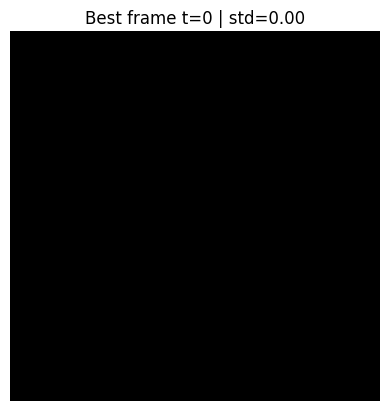

In [39]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

feat = ex.features.feature["steps/observation/image"]
best = None  # (score, t, img)

for t in range(0, len(feat.bytes_list.value), 10):  # stride to keep it fast
    img = tf.io.decode_png(feat.bytes_list.value[t], channels=3).numpy()
    score = float(img.std())
    if best is None or score > best[0]:
        best = (score, t, img)

score, t, img = best
print("Best frame:", t, "std:", score, "min/max:", img.min(), img.max())

plt.figure()
plt.imshow(img)
plt.axis("off")
plt.title(f"Best frame t={t} | std={score:.2f}")
plt.show()


In [44]:
CANDIDATES = [
"fractal20220817_data",
"kuka",
"bridge",
"taco_play",
"jaco_play",
"berkeley_cable_routing",
"roboturk",
"nyu_door_opening_surprising_effectiveness",
"viola",
"berkeley_autolab_ur5",
"toto",
"language_table",
"columbia_cairlab_pusht_real",
"stanford_kuka_multimodal_dataset_converted_externally_to_rlds",
"nyu_rot_dataset_converted_externally_to_rlds",
"stanford_hydra_dataset_converted_externally_to_rlds",
"austin_buds_dataset_converted_externally_to_rlds",
"nyu_franka_play_dataset_converted_externally_to_rlds",
"maniskill_dataset_converted_externally_to_rlds",
"furniture_bench_dataset_converted_externally_to_rlds",
"cmu_franka_exploration_dataset_converted_externally_to_rlds",
"ucsd_kitchen_dataset_converted_externally_to_rlds",
"ucsd_pick_and_place_dataset_converted_externally_to_rlds",
"austin_sailor_dataset_converted_externally_to_rlds",
"austin_sirius_dataset_converted_externally_to_rlds",
"bc_z",
"usc_cloth_sim_converted_externally_to_rlds",
"utokyo_pr2_opening_fridge_converted_externally_to_rlds",
"utokyo_pr2_tabletop_manipulation_converted_externally_to_rlds",
"utokyo_saytap_converted_externally_to_rlds",
"utokyo_xarm_pick_and_place_converted_externally_to_rlds",
"utokyo_xarm_bimanual_converted_externally_to_rlds",
"robo_net",
"berkeley_mvp_converted_externally_to_rlds",
"berkeley_rpt_converted_externally_to_rlds",
"kaist_nonprehensile_converted_externally_to_rlds",
"stanford_mask_vit_converted_externally_to_rlds",
"tokyo_u_lsmo_converted_externally_to_rlds",
"dlr_sara_pour_converted_externally_to_rlds",
"dlr_sara_grid_clamp_converted_externally_to_rlds",
"dlr_edan_shared_control_converted_externally_to_rlds",
"asu_table_top_converted_externally_to_rlds",
"stanford_robocook_converted_externally_to_rlds",
"eth_agent_affordances",
"imperialcollege_sawyer_wrist_cam",
"iamlab_cmu_pickup_insert_converted_externally_to_rlds",
"qut_dexterous_manipulation",
"uiuc_d3field",
"utaustin_mutex",
"berkeley_fanuc_manipulation",
"cmu_playing_with_food",
"cmu_play_fusion",
"cmu_stretch",
"berkeley_gnm_recon",
"berkeley_gnm_cory_hall",
"berkeley_gnm_sac_son",
"robot_vqa",
"droid",
"conq_hose_manipulation",
"dobbe",
"fmb",
"io_ai_tech",
"mimic_play",
"aloha_mobile",
"robo_set",
"tidybot",
"vima_converted_externally_to_rlds",
"spoc",
"plex_robosuite"
]

In [45]:
import json, re
from pathlib import Path

def list_versions(ds):
    out = gsutil(f'ls "gs://gdm-robotics-open-x-embodiment/{ds}/"')
    lines = [ln.strip() for ln in out.splitlines() if ln.strip().startswith("gs://")]
    # keep things that look like "x.y.z/:" or "x.y.z_$folder$"
    vers = []
    for ln in lines:
        name = ln.rstrip("/").split("/")[-1]
        name = name.replace("_$folder$", "").replace(":", "")
        if re.match(r"^\d+\.\d+\.\d+$", name):
            vers.append(name)
    # sort semver-ish
    def semver_key(s): return tuple(int(x) for x in s.split("."))
    return sorted(set(vers), key=semver_key)

def load_features_json(ds, version, out_dir):
    out_dir.mkdir(parents=True, exist_ok=True)
    gcs = f'gs://gdm-robotics-open-x-embodiment/{ds}/{version}/features.json'
    local = out_dir / f"{ds}__{version}__features.json"
    gsutil(f'cp "{gcs}" "{local}"')
    return json.loads(local.read_text()), local

def find_image_descriptions(feats):
    # find any "description" fields near "image" features
    descs = []
    def rec(o, path=""):
        if isinstance(o, dict):
            for k,v in o.items():
                rec(v, f"{path}/{k}")
        elif isinstance(o, list):
            for i,v in enumerate(o):
                rec(v, f"{path}[{i}]")
        else:
            if isinstance(o, str) and "description" in path and re.search(r"(image|rgb|camera|wrist|front|left|right)", path, re.I):
                descs.append((path, o))
    rec(feats)
    return descs

def has_real_rgb(desc_text: str):
    # heuristic: placeholder datasets explicitly say not available / zeros
    bad = ["not available", "np.zeros", "zeros"]
    return not any(b in desc_text.lower() for b in bad)

SCAN_DIR = OUT_DIR.parent / "features_scan"
results = []

for ds in CANDIDATES:
    try:
        vers = list_versions(ds)
        if not vers:
            results.append((ds, None, False, "no version folders found"))
            continue
        v = vers[-1]  # latest
        feats, local_path = load_features_json(ds, v, SCAN_DIR)
        descs = find_image_descriptions(feats)

        # if no image descriptions found, still might have images; mark unknown
        if not descs:
            results.append((ds, v, None, f"features.json downloaded ({local_path.name}) but no image description hits"))
            continue

        # decide based on any description that looks real
        real_any = any(has_real_rgb(d) for _, d in descs)
        # keep one representative description
        rep = descs[0][1]
        results.append((ds, v, real_any, rep[:140].replace("\n"," ")))
    except Exception as e:
        results.append((ds, None, False, f"error: {e}"))

# print report
for ds, v, ok, note in results:
    print(f"- {ds:45s}  version={str(v):7s}  rgb_real={ok}  note={note}")


- fractal20220817_data                           version=None     rgb_real=False  note=error: Command 'gsutil cp "gs://gdm-robotics-open-x-embodiment/fractal20220817_data/0.1.0/features.json" "/ibex/project/c2320/dataset-check/huggingface/oxe_peek/features_scan/fractal20220817_data__0.1.0__features.json"' returned non-zero exit status 1.
- kuka                                           version=0.1.0    rgb_real=None  note=features.json downloaded (kuka__0.1.0__features.json) but no image description hits
- bridge                                         version=None     rgb_real=False  note=error: Command 'gsutil cp "gs://gdm-robotics-open-x-embodiment/bridge/0.1.0/features.json" "/ibex/project/c2320/dataset-check/huggingface/oxe_peek/features_scan/bridge__0.1.0__features.json"' returned non-zero exit status 1.
- taco_play                                      version=None     rgb_real=False  note=error: Command 'gsutil cp "gs://gdm-robotics-open-x-embodiment/taco_play/0.1.0/features.jso

In [42]:
# Cell 3 — pick a dataset with rgb_real=True (from the printed report)
DATASET = "berkeley_fanuc_manipulation"  # <-- change based on scan output
VERSION = list_versions(DATASET)[-1]
print("Using:", DATASET, VERSION)

# list tfrecords
out = gsutil(f'ls -r "gs://gdm-robotics-open-x-embodiment/{DATASET}/{VERSION}/"')
paths = [ln.strip() for ln in out.splitlines() if ln.strip().startswith("gs://")]
tfrecords = [p for p in paths if "tfrecord" in p.lower()]
print("TFRecord shards:", len(tfrecords))
print("\n".join(tfrecords[:10]))


Using: berkeley_fanuc_manipulation 0.1.0
TFRecord shards: 124
gs://gdm-robotics-open-x-embodiment/berkeley_fanuc_manipulation/0.1.0/berkeley_fanuc_manipulation-train.tfrecord-00000-of-00124
gs://gdm-robotics-open-x-embodiment/berkeley_fanuc_manipulation/0.1.0/berkeley_fanuc_manipulation-train.tfrecord-00001-of-00124
gs://gdm-robotics-open-x-embodiment/berkeley_fanuc_manipulation/0.1.0/berkeley_fanuc_manipulation-train.tfrecord-00002-of-00124
gs://gdm-robotics-open-x-embodiment/berkeley_fanuc_manipulation/0.1.0/berkeley_fanuc_manipulation-train.tfrecord-00003-of-00124
gs://gdm-robotics-open-x-embodiment/berkeley_fanuc_manipulation/0.1.0/berkeley_fanuc_manipulation-train.tfrecord-00004-of-00124
gs://gdm-robotics-open-x-embodiment/berkeley_fanuc_manipulation/0.1.0/berkeley_fanuc_manipulation-train.tfrecord-00005-of-00124
gs://gdm-robotics-open-x-embodiment/berkeley_fanuc_manipulation/0.1.0/berkeley_fanuc_manipulation-train.tfrecord-00006-of-00124
gs://gdm-robotics-open-x-embodiment/berkel

In [47]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import re

# ---------- helpers (robust) ----------
IMG_KEY_PAT = re.compile(r"(image|rgb|camera)", re.IGNORECASE)

def decode_frame(b):
    # try PNG, then JPEG, then serialized tensor
    try:
        return tf.io.decode_png(b, channels=3).numpy()
    except Exception:
        pass
    try:
        return tf.io.decode_jpeg(b, channels=3).numpy()
    except Exception:
        pass
    try:
        return tf.io.parse_tensor(b, out_type=tf.uint8).numpy()
    except Exception:
        pass
    return None

def detect_record_type(serialized):
    try:
        seq = tf.train.SequenceExample.FromString(serialized)
        if len(seq.feature_lists.feature_list) > 0:
            return "SequenceExample"
    except Exception:
        pass
    try:
        ex = tf.train.Example.FromString(serialized)
        if len(ex.features.feature) > 0:
            return "Example"
    except Exception:
        pass
    return "Unknown"

def get_example_from_first_record(local_shard_path: Path):
    raw_ds = tf.data.TFRecordDataset([str(local_shard_path)])
    first = next(iter(raw_ds.take(1))).numpy()
    rtype = detect_record_type(first)
    if rtype == "Example":
        return tf.train.Example.FromString(first), "Example"
    elif rtype == "SequenceExample":
        # If some dataset uses SequenceExample, we can still inspect keys,
        # but your snippet is Example-based; return the seq so we can print keys.
        return tf.train.SequenceExample.FromString(first), "SequenceExample"
    else:
        raise ValueError("Could not parse record as Example or SequenceExample")

def list_tfrecords(ds, version):
    out = gsutil(f'ls -r "gs://gdm-robotics-open-x-embodiment/{ds}/{version}/"')
    paths = [ln.strip() for ln in out.splitlines() if ln.strip().startswith("gs://")]
    tfrecords = [p for p in paths if "tfrecord" in p.lower()]
    return tfrecords

def save_montage(frames, out_png: Path, title: str):
    cols = len(frames)
    plt.figure(figsize=(4 * cols, 4))
    for j, (t, img) in enumerate(frames):
        plt.subplot(1, cols, j + 1)
        if img is None:
            plt.text(0.5, 0.5, "decode failed", ha="center", va="center")
        else:
            plt.imshow(img)
        plt.axis("off")
        plt.title(f"t={t}\n{None if img is None else img.shape}")
    plt.suptitle(title, y=1.05)
    plt.tight_layout()
    plt.savefig(out_png, dpi=150, bbox_inches="tight")
    plt.close()

# ---------- main: run for all rgb_real=True ----------
# `results` is from your scan loop: (ds, v, ok, note)
true_rows = [(ds, v, note) for (ds, v, ok, note) in results if ok is True]

print("rgb_real=True datasets:", len(true_rows))
for ds, v, note in true_rows:
    print(f"- {ds}  v={v}  note={note}")

OUT_ROOT = OUT_DIR.parent / "oxe_peek_true_runs"
OUT_ROOT.mkdir(parents=True, exist_ok=True)

for DATASET, VERSION, note in true_rows:
    print("\n" + "="*80)
    print(f"[{DATASET}] VERSION={VERSION}")
    print(f"[{DATASET}] note={note}")

    try:
        tfrecords = list_tfrecords(DATASET, VERSION)
        print(f"[{DATASET}] TFRecord shards: {len(tfrecords)}")
        if not tfrecords:
            print(f"[{DATASET}] No tfrecords found -> skip")
            continue

        OUT_DS = OUT_ROOT / DATASET
        OUT_DS.mkdir(parents=True, exist_ok=True)

        SAMPLE_SHARD = tfrecords[0]  # deterministic
        LOCAL_SHARD = OUT_DS / Path(SAMPLE_SHARD).name

        if not LOCAL_SHARD.exists() or LOCAL_SHARD.stat().st_size == 0:
            gsutil(f'cp "{SAMPLE_SHARD}" "{LOCAL_SHARD}"')

        print(f"[{DATASET}] Downloaded {LOCAL_SHARD.name}  MB={LOCAL_SHARD.stat().st_size/1e6:.2f}")

        parsed, rtype = get_example_from_first_record(LOCAL_SHARD)
        print(f"[{DATASET}] Record type: {rtype}")

        if rtype == "SequenceExample":
            seq = parsed
            ctx_keys = list(seq.context.feature.keys())
            seq_keys = list(seq.feature_lists.feature_list.keys())
            print(f"[{DATASET}] SequenceExample context keys (first 50): {ctx_keys[:50]}")
            print(f"[{DATASET}] SequenceExample seq keys (first 50): {seq_keys[:50]}")
            # You can extend here later if needed.
            continue

        ex = parsed  # tf.train.Example

        # find any keys that look like images
        img_keys = [k for k in ex.features.feature.keys() if IMG_KEY_PAT.search(k)]
        print(f"[{DATASET}] Image-like keys: {img_keys}")

        if not img_keys:
            print(f"[{DATASET}] No image-like keys -> skip")
            continue

        # pick first image key that actually has bytes
        chosen_k = None
        chosen_vals = None
        for k in img_keys:
            vals = list(ex.features.feature[k].bytes_list.value)
            if len(vals) > 0:
                chosen_k = k
                chosen_vals = vals
                break

        if chosen_k is None:
            print(f"[{DATASET}] image-like keys exist but empty bytes_list -> skip")
            continue

        n = len(chosen_vals)
        print(f"[{DATASET}] Using image key: {chosen_k}  num entries: {n}")

        # choose 6 evenly spaced indices
        idxs = np.linspace(0, n - 1, num=min(6, n), dtype=int) if n > 1 else np.array([0], dtype=int)

        frames = []
        for t in idxs:
            img = decode_frame(chosen_vals[int(t)])
            frames.append((int(t), img))

        out_png = OUT_DS / f"peek__{DATASET}__{VERSION}.png"
        title = f"{DATASET}  v={VERSION}\nkey={chosen_k}"
        save_montage(frames, out_png, title)

        # quick sanity stats (to catch the "all-black" case)
        nonnull = [img for _, img in frames if img is not None]
        if nonnull:
            mx = max(int(img.max()) for img in nonnull)
            mn = min(int(img.min()) for img in nonnull)
            print(f"[{DATASET}] montage saved: {out_png} | min/max across shown frames: {mn}/{mx}")
            if mx == 0:
                print(f"[{DATASET}] WARNING: shown frames are all-black (could still be a placeholder dataset).")
        else:
            print(f"[{DATASET}] montage saved: {out_png} | but all decodes failed")

    except Exception as e:
        print(f"[{DATASET}] ERROR: {e}")


rgb_real=True datasets: 21
- language_table  v=0.1.0  note=An RGB image of the scene.
- stanford_hydra_dataset_converted_externally_to_rlds  v=0.1.0  note=Main camera RGB observation.
- austin_buds_dataset_converted_externally_to_rlds  v=0.1.0  note=Main camera RGB observation.
- furniture_bench_dataset_converted_externally_to_rlds  v=0.1.0  note=Main camera RGB observation.
- cmu_franka_exploration_dataset_converted_externally_to_rlds  v=0.1.0  note=Main camera RGB observation.
- ucsd_kitchen_dataset_converted_externally_to_rlds  v=0.1.0  note=Main camera RGB observation.
- austin_sirius_dataset_converted_externally_to_rlds  v=0.1.0  note=Wrist camera RGB observation.
- utokyo_pr2_tabletop_manipulation_converted_externally_to_rlds  v=1.0.0  note=Main camera RGB observation.
- utokyo_saytap_converted_externally_to_rlds  v=0.1.0  note=Dummy wrist camera RGB observation.
- berkeley_mvp_converted_externally_to_rlds  v=0.1.0  note=Hand camera RGB observation.
- kaist_nonprehensile_converte

In [48]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from pathlib import Path
import re

IMG_KEY_PAT = re.compile(r"(image|rgb|camera)", re.IGNORECASE)

def decode_frame(b):
    try:
        return tf.io.decode_png(b, channels=3).numpy()
    except Exception:
        pass
    try:
        return tf.io.decode_jpeg(b, channels=3).numpy()
    except Exception:
        pass
    try:
        return tf.io.parse_tensor(b, out_type=tf.uint8).numpy()
    except Exception:
        pass
    return None

def find_image_key(ex):
    keys = [k for k in ex.features.feature.keys() if IMG_KEY_PAT.search(k)]
    for k in keys:
        vals = list(ex.features.feature[k].bytes_list.value)
        if len(vals) > 0:
            return k, vals
    return None, None

def best_frame_from_vals(vals, stride=10):
    best = None  # (score, t, img)
    for t in range(0, len(vals), stride):
        img = decode_frame(vals[t])
        if img is None:
            continue
        score = float(img.std())
        if (best is None) or (score > best[0]):
            best = (score, t, img)
    return best  # can be None

def visualize_random_records(local_shard: Path, n_records=6, seed=0):
    raw_ds = tf.data.TFRecordDataset([str(local_shard)])
    # shuffle records (episodes) within this shard
    ds = raw_ds.shuffle(1000, seed=seed, reshuffle_each_iteration=False).take(n_records)

    picks = []
    for rec in ds:
        ex = tf.train.Example.FromString(rec.numpy())
        k, vals = find_image_key(ex)
        if k is None:
            picks.append(("no_image_key", None, None, None))
            continue
        best = best_frame_from_vals(vals, stride=max(1, len(vals)//64))  # adaptive stride
        if best is None:
            picks.append((k, None, None, None))
        else:
            score, t, img = best
            picks.append((k, t, score, img))

    # plot
    cols = len(picks)
    plt.figure(figsize=(4*cols, 4))
    for j, (k, t, score, img) in enumerate(picks):
        plt.subplot(1, cols, j+1)
        if img is None:
            plt.text(0.5, 0.5, f"{k}\n(no decode)", ha="center", va="center")
        else:
            plt.imshow(img)
            plt.title(f"{k}\nt={t} std={score:.2f}\nmin/max={img.min()}/{img.max()}")
        plt.axis("off")
    plt.tight_layout()
    plt.show()


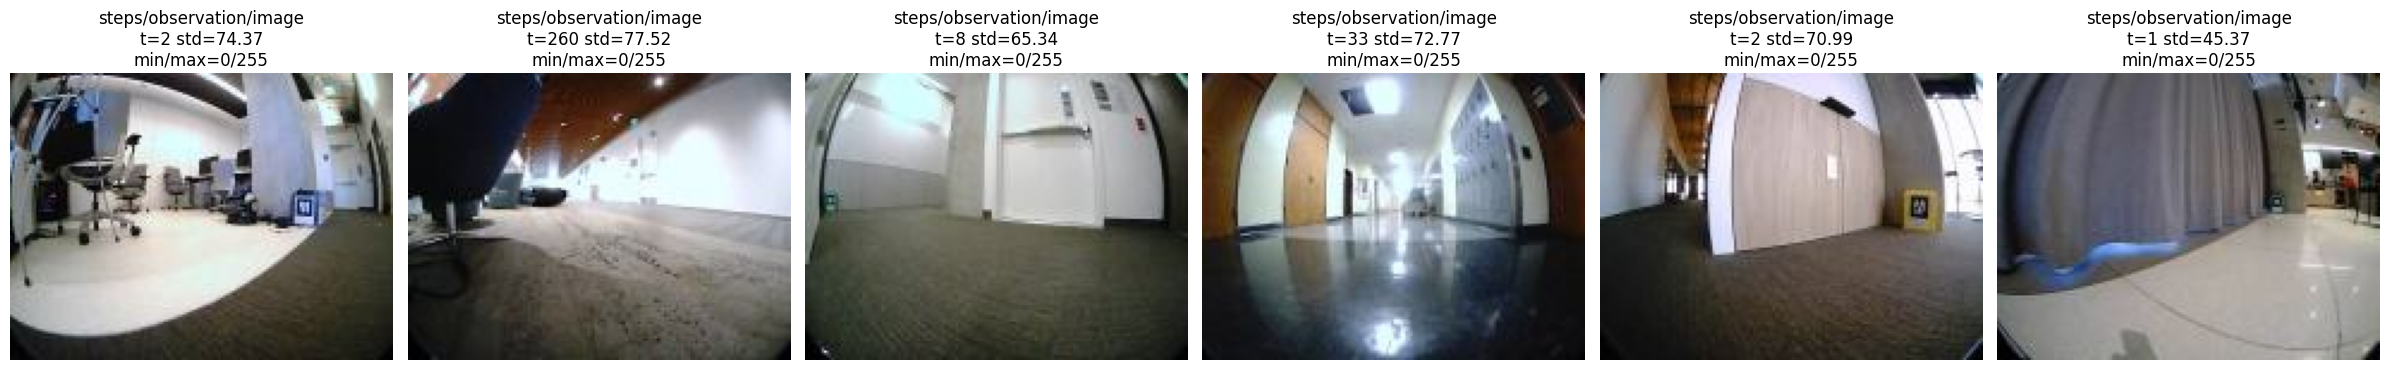

In [49]:
visualize_random_records(LOCAL_SHARD, n_records=6, seed=42)


TFRecord shards: 124
LOCAL_SHARD: /ibex/project/c2320/dataset-check/huggingface/oxe_peek_true_runs/berkeley_fanuc_manipulation/berkeley_fanuc_manipulation-train.tfrecord-00000-of-00124 MB: 103.719022


2025-12-16 10:42:50.118406: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


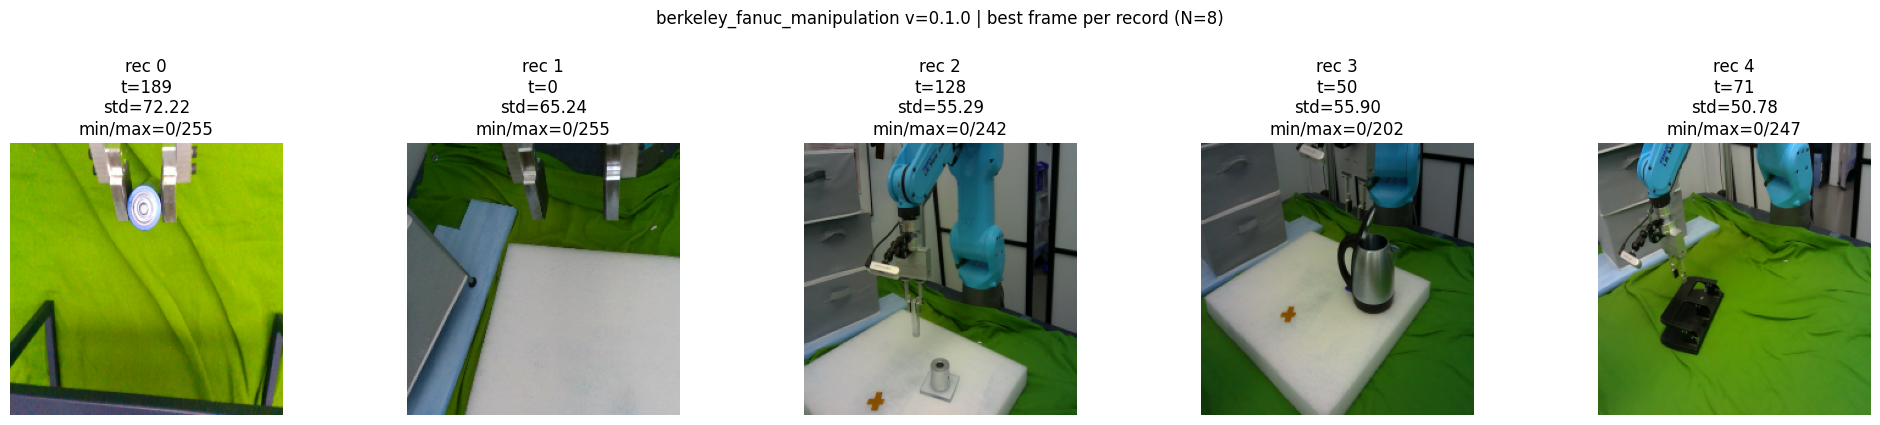

In [50]:
import re
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from pathlib import Path

# ---- assumes you already have gsutil() helper like in your notebook ----
# gsutil(cmd: str) -> str (runs gsutil and returns stdout)
# If you don't, uncomment this minimal version:
# import subprocess
# def gsutil(cmd: str) -> str:
#     p = subprocess.run(["bash","-lc", f"gsutil {cmd}"], stdout=subprocess.PIPE, stderr=subprocess.STDOUT, text=True)
#     if p.returncode != 0:
#         raise RuntimeError(p.stdout)
#     return p.stdout

CACHE_ROOT = Path("/ibex/project/c2320/dataset-check/huggingface")
OUT_ROOT = CACHE_ROOT / "oxe_peek_true_runs"
OUT_ROOT.mkdir(parents=True, exist_ok=True)

IMG_KEY_PAT = re.compile(r"(image|rgb|camera)", re.IGNORECASE)

def decode_frame(b):
    try:
        return tf.io.decode_png(b, channels=3).numpy()
    except Exception:
        pass
    try:
        return tf.io.decode_jpeg(b, channels=3).numpy()
    except Exception:
        pass
    try:
        return tf.io.parse_tensor(b, out_type=tf.uint8).numpy()
    except Exception:
        pass
    return None

def list_tfrecords(dataset, version):
    out = gsutil(f'ls -r "gs://gdm-robotics-open-x-embodiment/{dataset}/{version}/"')
    paths = [ln.strip() for ln in out.splitlines() if ln.strip().startswith("gs://")]
    return [p for p in paths if "tfrecord" in p.lower()]

def get_example_from_record_bytes(rec_bytes: bytes):
    # Your data (so far) parses as tf.train.Example
    return tf.train.Example.FromString(rec_bytes)

def find_image_key(ex):
    # pick first image-like key with bytes_list
    for k in ex.features.feature.keys():
        if IMG_KEY_PAT.search(k):
            vals = list(ex.features.feature[k].bytes_list.value)
            if vals:
                return k, vals
    return None, None

def best_frame(vals, stride=10):
    best = None  # (std, t, img)
    for t in range(0, len(vals), stride):
        img = decode_frame(vals[t])
        if img is None:
            continue
        s = float(img.std())
        if best is None or s > best[0]:
            best = (s, t, img)
    return best

def visualize_multiple_records(local_shard: Path, dataset: str, version: str, n_records=8, seed=42):
    raw_ds = tf.data.TFRecordDataset([str(local_shard)])

    ds = raw_ds.shuffle(
        buffer_size=1000, seed=seed, reshuffle_each_iteration=False
    ).take(n_records)

    picks = []
    for i, rec in enumerate(ds):
        ex = get_example_from_record_bytes(rec.numpy())
        k, vals = find_image_key(ex)

        if k is None:
            picks.append((i, None, None, None))
            continue

        stride = max(1, len(vals) // 64)  # adaptive (keeps it fast)
        bf = best_frame(vals, stride=stride)

        if bf is None:
            picks.append((i, k, None, None))
        else:
            s, t, img = bf
            picks.append((i, k, t, img))

    # plot side-by-side
    plt.figure(figsize=(4 * len(picks), 4))
    for j, (i, k, t, img) in enumerate(picks):
        plt.subplot(1, len(picks), j + 1)
        if img is None:
            plt.text(0.5, 0.5, f"record {i}\n(no image)", ha="center", va="center")
        else:
            plt.imshow(img)
            plt.title(
                f"rec {i}\n"
                f"t={t}\n"
                f"std={img.std():.2f}\n"
                f"min/max={int(img.min())}/{int(img.max())}"
            )
        plt.axis("off")

    plt.suptitle(f"{dataset} v={version} | best frame per record (N={n_records})", y=1.05)
    plt.tight_layout()
    plt.show()

# -----------------------------
# EXAMPLE: run on one dataset (you can change these)
# -----------------------------
DATASET = "berkeley_fanuc_manipulation"
VERSION = "0.1.0"   # you already print this using list_versions(DATASET)[-1] in your notebook

tfrecords = list_tfrecords(DATASET, VERSION)
print("TFRecord shards:", len(tfrecords))

SAMPLE_SHARD = tfrecords[0]
OUT_DS = OUT_ROOT / DATASET
OUT_DS.mkdir(parents=True, exist_ok=True)
LOCAL_SHARD = OUT_DS / Path(SAMPLE_SHARD).name

# download once
if not LOCAL_SHARD.exists() or LOCAL_SHARD.stat().st_size == 0:
    gsutil(f'cp "{SAMPLE_SHARD}" "{LOCAL_SHARD}"')

print("LOCAL_SHARD:", LOCAL_SHARD, "MB:", LOCAL_SHARD.stat().st_size/1e6)

# visualize multiple records (episodes) from this shard
visualize_multiple_records(LOCAL_SHARD, DATASET, VERSION, n_records=8, seed=42)


rgb_real=True datasets: 21
- language_table  v=0.1.0  note=An RGB image of the scene.
- stanford_hydra_dataset_converted_externally_to_rlds  v=0.1.0  note=Main camera RGB observation.
- austin_buds_dataset_converted_externally_to_rlds  v=0.1.0  note=Main camera RGB observation.
- furniture_bench_dataset_converted_externally_to_rlds  v=0.1.0  note=Main camera RGB observation.
- cmu_franka_exploration_dataset_converted_externally_to_rlds  v=0.1.0  note=Main camera RGB observation.
- ucsd_kitchen_dataset_converted_externally_to_rlds  v=0.1.0  note=Main camera RGB observation.
- austin_sirius_dataset_converted_externally_to_rlds  v=0.1.0  note=Wrist camera RGB observation.
- utokyo_pr2_tabletop_manipulation_converted_externally_to_rlds  v=1.0.0  note=Main camera RGB observation.
- utokyo_saytap_converted_externally_to_rlds  v=0.1.0  note=Dummy wrist camera RGB observation.
- berkeley_mvp_converted_externally_to_rlds  v=0.1.0  note=Hand camera RGB observation.
- kaist_nonprehensile_converte

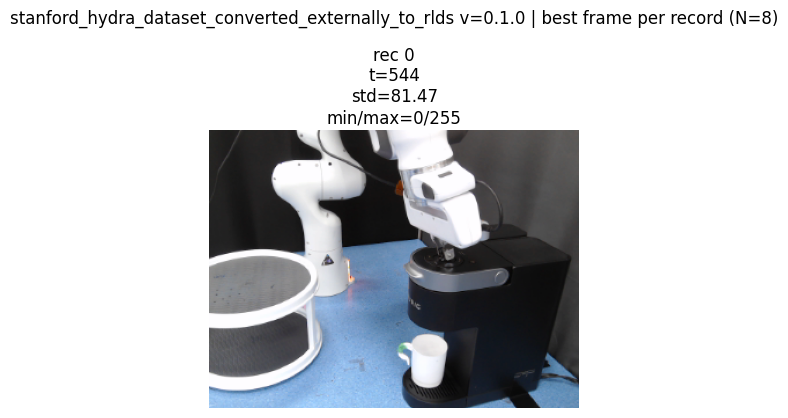


[austin_buds_dataset_converted_externally_to_rlds] v=0.1.0
[austin_buds_dataset_converted_externally_to_rlds] note=Main camera RGB observation.
[austin_buds_dataset_converted_externally_to_rlds] TFRecord shards: 16
[austin_buds_dataset_converted_externally_to_rlds] LOCAL_SHARD: /ibex/project/c2320/dataset-check/huggingface/oxe_peek_true_runs/austin_buds_dataset_converted_externally_to_rlds/austin_buds_dataset_converted_externally_to_rlds-train.tfrecord-00000-of-00016  MB=30.54


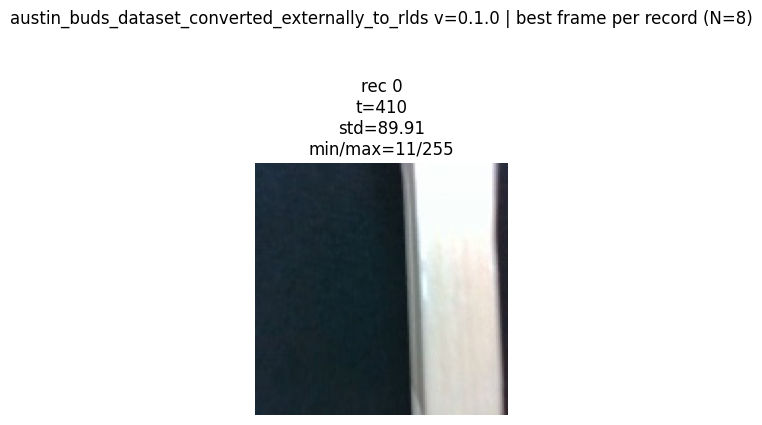


[furniture_bench_dataset_converted_externally_to_rlds] v=0.1.0
[furniture_bench_dataset_converted_externally_to_rlds] note=Main camera RGB observation.
[furniture_bench_dataset_converted_externally_to_rlds] TFRecord shards: 1016
[furniture_bench_dataset_converted_externally_to_rlds] LOCAL_SHARD: /ibex/project/c2320/dataset-check/huggingface/oxe_peek_true_runs/furniture_bench_dataset_converted_externally_to_rlds/furniture_bench_dataset_converted_externally_to_rlds-train.tfrecord-00000-of-01016  MB=65.77


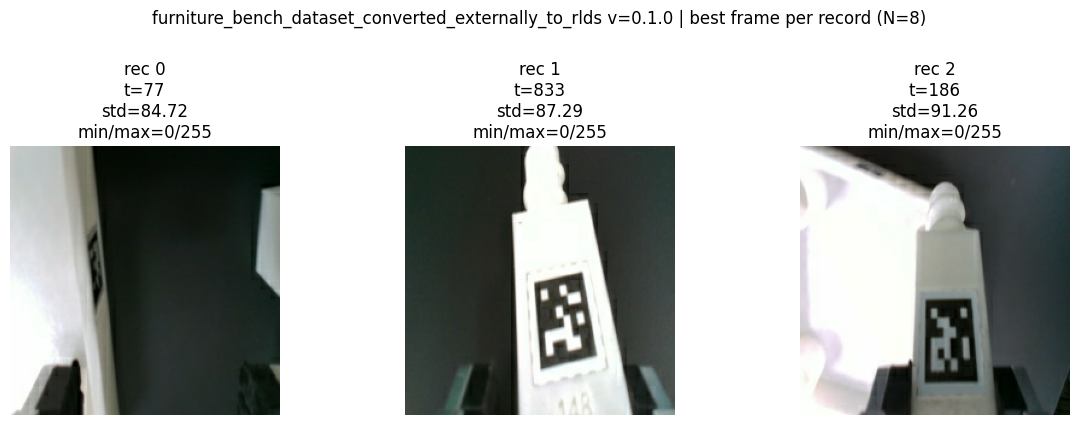


[cmu_franka_exploration_dataset_converted_externally_to_rlds] v=0.1.0
[cmu_franka_exploration_dataset_converted_externally_to_rlds] note=Main camera RGB observation.
[cmu_franka_exploration_dataset_converted_externally_to_rlds] TFRecord shards: 8
[cmu_franka_exploration_dataset_converted_externally_to_rlds] LOCAL_SHARD: /ibex/project/c2320/dataset-check/huggingface/oxe_peek_true_runs/cmu_franka_exploration_dataset_converted_externally_to_rlds/cmu_franka_exploration_dataset_converted_externally_to_rlds-train.tfrecord-00000-of-00008  MB=98.33


2025-12-16 10:55:00.801125: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


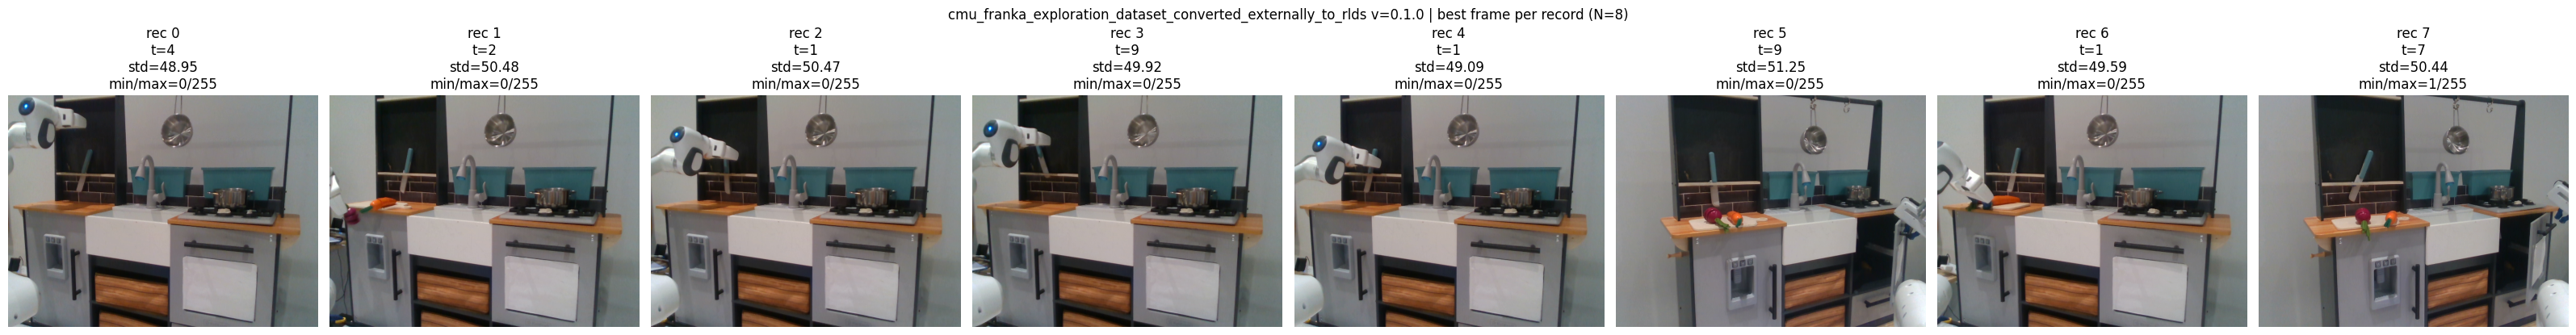


[ucsd_kitchen_dataset_converted_externally_to_rlds] v=0.1.0
[ucsd_kitchen_dataset_converted_externally_to_rlds] note=Main camera RGB observation.
[ucsd_kitchen_dataset_converted_externally_to_rlds] TFRecord shards: 16
[ucsd_kitchen_dataset_converted_externally_to_rlds] LOCAL_SHARD: /ibex/project/c2320/dataset-check/huggingface/oxe_peek_true_runs/ucsd_kitchen_dataset_converted_externally_to_rlds/ucsd_kitchen_dataset_converted_externally_to_rlds-train.tfrecord-00000-of-00016  MB=48.24


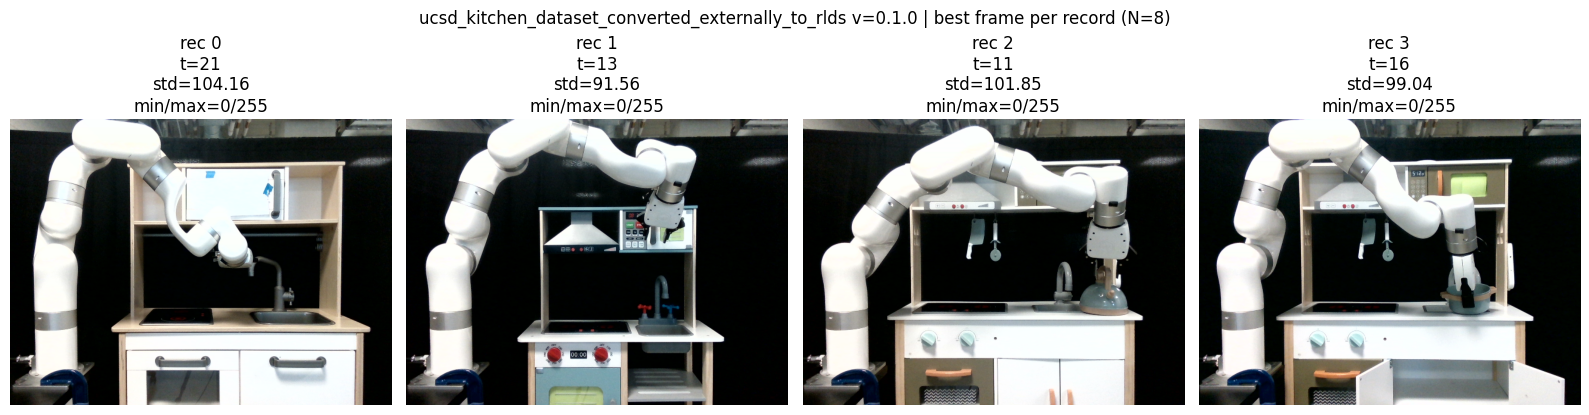


[austin_sirius_dataset_converted_externally_to_rlds] v=0.1.0
[austin_sirius_dataset_converted_externally_to_rlds] note=Wrist camera RGB observation.
[austin_sirius_dataset_converted_externally_to_rlds] TFRecord shards: 64
[austin_sirius_dataset_converted_externally_to_rlds] LOCAL_SHARD: /ibex/project/c2320/dataset-check/huggingface/oxe_peek_true_runs/austin_sirius_dataset_converted_externally_to_rlds/austin_sirius_dataset_converted_externally_to_rlds-train.tfrecord-00000-of-00064  MB=178.21


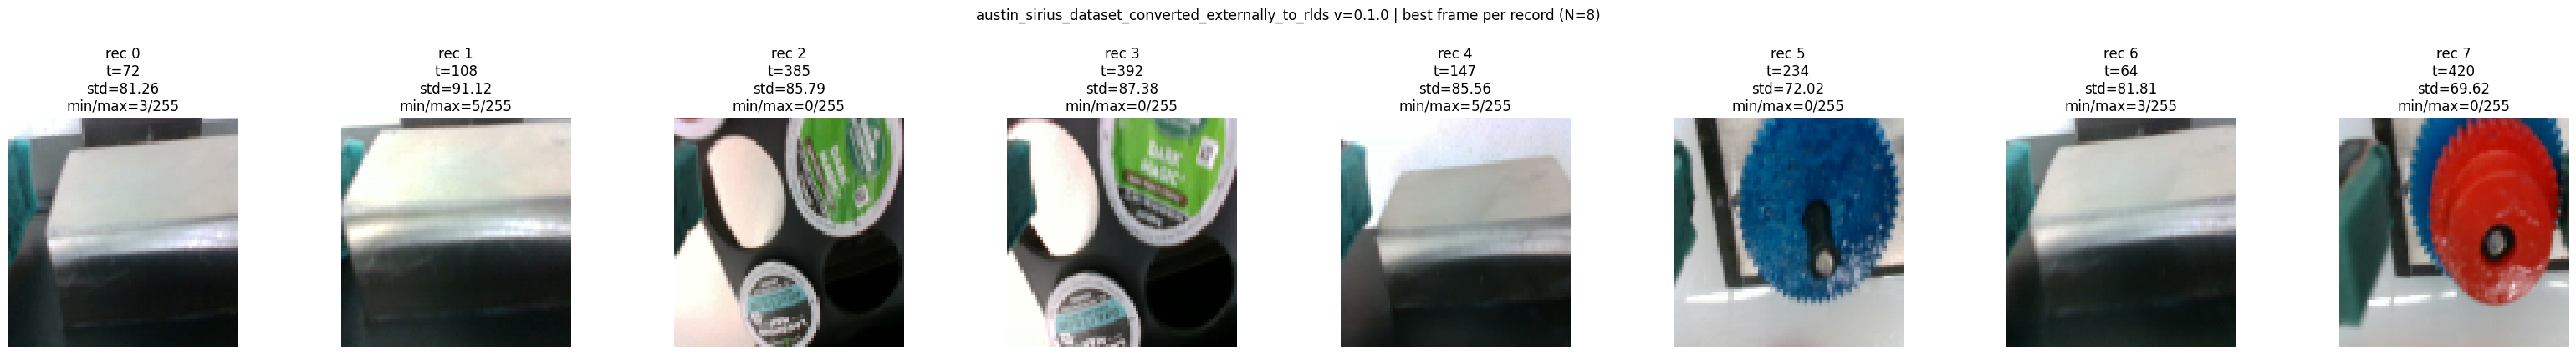


[utokyo_pr2_tabletop_manipulation_converted_externally_to_rlds] v=1.0.0
[utokyo_pr2_tabletop_manipulation_converted_externally_to_rlds] note=Main camera RGB observation.
[utokyo_pr2_tabletop_manipulation_converted_externally_to_rlds] TFRecord shards: 0
[utokyo_pr2_tabletop_manipulation_converted_externally_to_rlds] No tfrecords -> skip

[utokyo_saytap_converted_externally_to_rlds] v=0.1.0
[utokyo_saytap_converted_externally_to_rlds] note=Dummy wrist camera RGB observation.
[utokyo_saytap_converted_externally_to_rlds] TFRecord shards: 1
[utokyo_saytap_converted_externally_to_rlds] LOCAL_SHARD: /ibex/project/c2320/dataset-check/huggingface/oxe_peek_true_runs/utokyo_saytap_converted_externally_to_rlds/utokyo_saytap_converted_externally_to_rlds-train.tfrecord-00000-of-00001  MB=58.03


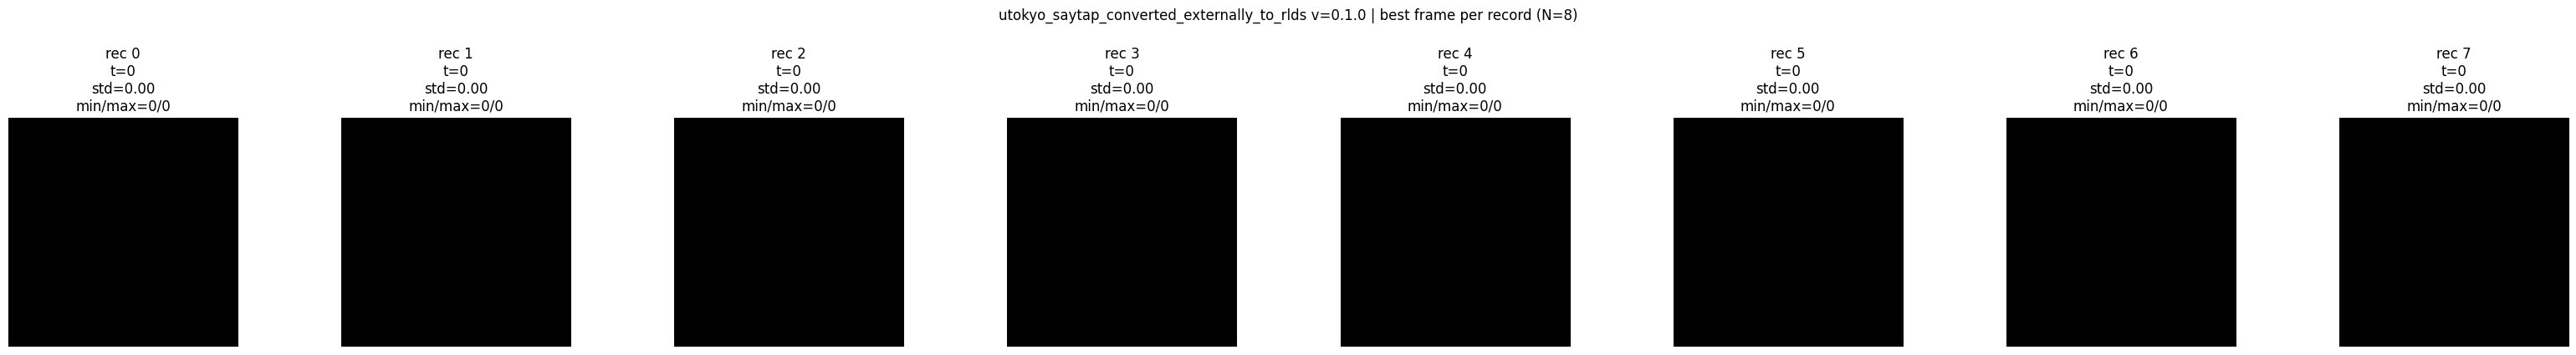


[berkeley_mvp_converted_externally_to_rlds] v=0.1.0
[berkeley_mvp_converted_externally_to_rlds] note=Hand camera RGB observation.
[berkeley_mvp_converted_externally_to_rlds] TFRecord shards: 124
[berkeley_mvp_converted_externally_to_rlds] LOCAL_SHARD: /ibex/project/c2320/dataset-check/huggingface/oxe_peek_true_runs/berkeley_mvp_converted_externally_to_rlds/berkeley_mvp_converted_externally_to_rlds-train.tfrecord-00000-of-00124  MB=82.58


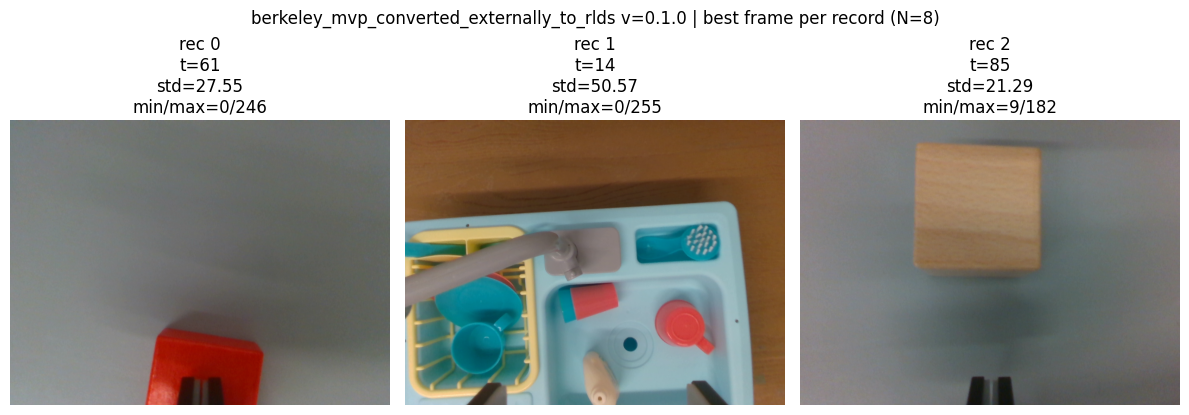


[kaist_nonprehensile_converted_externally_to_rlds] v=0.1.0
[kaist_nonprehensile_converted_externally_to_rlds] note=Main camera RGB observation.
[kaist_nonprehensile_converted_externally_to_rlds] TFRecord shards: 101
[kaist_nonprehensile_converted_externally_to_rlds] LOCAL_SHARD: /ibex/project/c2320/dataset-check/huggingface/oxe_peek_true_runs/kaist_nonprehensile_converted_externally_to_rlds/kaist_nonprehensile_converted_externally_to_rlds-train.tfrecord-00000-of-00101  MB=290.21


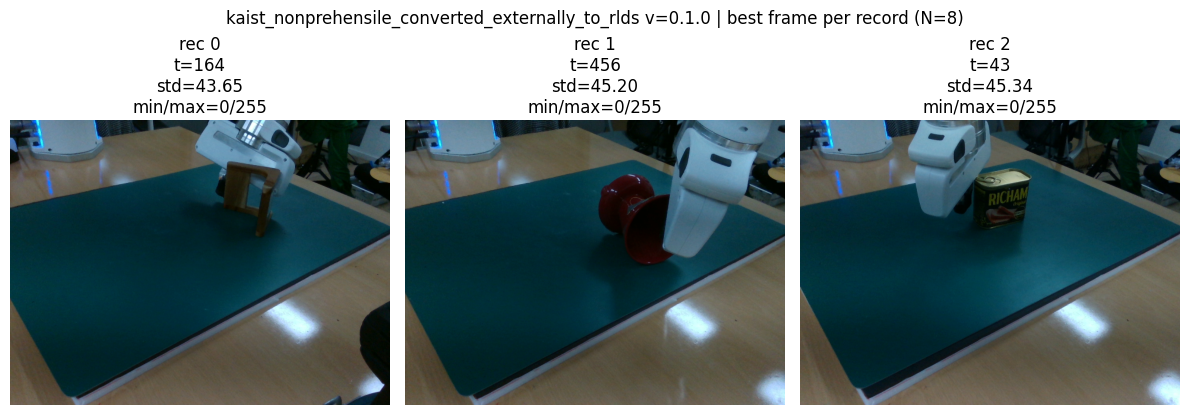


[dlr_sara_pour_converted_externally_to_rlds] v=0.1.0
[dlr_sara_pour_converted_externally_to_rlds] note=Main camera RGB observation.
[dlr_sara_pour_converted_externally_to_rlds] TFRecord shards: 31
[dlr_sara_pour_converted_externally_to_rlds] LOCAL_SHARD: /ibex/project/c2320/dataset-check/huggingface/oxe_peek_true_runs/dlr_sara_pour_converted_externally_to_rlds/dlr_sara_pour_converted_externally_to_rlds-train.tfrecord-00000-of-00031  MB=104.90


In [ ]:
import re
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from pathlib import Path

# Assumes you already have gsutil(cmd: str) -> str in your notebook.
# If not, uncomment this minimal version:
# import subprocess
# def gsutil(cmd: str) -> str:
#     p = subprocess.run(["bash","-lc", f"gsutil {cmd}"], stdout=subprocess.PIPE, stderr=subprocess.STDOUT, text=True)
#     if p.returncode != 0:
#         raise RuntimeError(p.stdout)
#     return p.stdout

CACHE_ROOT = Path("/ibex/project/c2320/dataset-check/huggingface")
OUT_ROOT = CACHE_ROOT / "oxe_peek_true_runs"
OUT_ROOT.mkdir(parents=True, exist_ok=True)

IMG_KEY_PAT = re.compile(r"(image|rgb|camera)", re.IGNORECASE)

def decode_frame(b):
    try:
        return tf.io.decode_png(b, channels=3).numpy()
    except Exception:
        pass
    try:
        return tf.io.decode_jpeg(b, channels=3).numpy()
    except Exception:
        pass
    try:
        return tf.io.parse_tensor(b, out_type=tf.uint8).numpy()
    except Exception:
        pass
    return None

def list_tfrecords(dataset, version):
    out = gsutil(f'ls -r "gs://gdm-robotics-open-x-embodiment/{dataset}/{version}/"')
    paths = [ln.strip() for ln in out.splitlines() if ln.strip().startswith("gs://")]
    return [p for p in paths if "tfrecord" in p.lower()]

def find_image_key(ex):
    for k in ex.features.feature.keys():
        if IMG_KEY_PAT.search(k):
            vals = list(ex.features.feature[k].bytes_list.value)
            if vals:
                return k, vals
    return None, None

def best_frame(vals, stride=10):
    best = None  # (std, t, img)
    for t in range(0, len(vals), stride):
        img = decode_frame(vals[t])
        if img is None:
            continue
        s = float(img.std())
        if best is None or s > best[0]:
            best = (s, t, img)
    return best

def visualize_multiple_records(local_shard: Path, dataset: str, version: str, n_records=8, seed=42):
    raw_ds = tf.data.TFRecordDataset([str(local_shard)])
    ds = raw_ds.shuffle(buffer_size=1000, seed=seed, reshuffle_each_iteration=False).take(n_records)

    picks = []
    for i, rec in enumerate(ds):
        ex = tf.train.Example.FromString(rec.numpy())
        k, vals = find_image_key(ex)

        if k is None:
            picks.append((i, None, None, None))
            continue

        stride = max(1, len(vals) // 64)  # adaptive for speed
        bf = best_frame(vals, stride=stride)

        if bf is None:
            picks.append((i, k, None, None))
        else:
            s, t, img = bf
            picks.append((i, k, t, img))

    plt.figure(figsize=(4 * len(picks), 4))
    for j, (i, k, t, img) in enumerate(picks):
        plt.subplot(1, len(picks), j + 1)
        if img is None:
            plt.text(0.5, 0.5, f"record {i}\n(no image)", ha="center", va="center")
        else:
            plt.imshow(img)
            plt.title(
                f"rec {i}\n"
                f"t={t}\n"
                f"std={img.std():.2f}\n"
                f"min/max={int(img.min())}/{int(img.max())}"
            )
        plt.axis("off")

    plt.suptitle(f"{dataset} v={version} | best frame per record (N={n_records})", y=1.05)
    plt.tight_layout()
    plt.show()

def batch_visualize_all_true(results, n_records=8, seed=42, overwrite_download=False):
    """
    results: list of (ds, v, ok, note) from your scan loop.
    Runs the multi-record visualization for all ok == True datasets.
    Downloads shard 0 into: /ibex/project/c2320/dataset-check/huggingface/oxe_peek_true_runs/<dataset>/
    """
    true_rows = [(ds, v, note) for (ds, v, ok, note) in results if ok is True]
    print("rgb_real=True datasets:", len(true_rows))
    for ds, v, note in true_rows:
        print(f"- {ds}  v={v}  note={note}")

    for dataset, version, note in true_rows:
        print("\n" + "=" * 90)
        print(f"[{dataset}] v={version}")
        print(f"[{dataset}] note={note}")

        try:
            tfrecords = list_tfrecords(dataset, version)
            print(f"[{dataset}] TFRecord shards: {len(tfrecords)}")
            if not tfrecords:
                print(f"[{dataset}] No tfrecords -> skip")
                continue

            sample_shard = tfrecords[0]
            out_ds = OUT_ROOT / dataset
            out_ds.mkdir(parents=True, exist_ok=True)
            local_shard = out_ds / Path(sample_shard).name

            if overwrite_download and local_shard.exists():
                local_shard.unlink()

            if not local_shard.exists() or local_shard.stat().st_size == 0:
                gsutil(f'cp "{sample_shard}" "{local_shard}"')

            print(f"[{dataset}] LOCAL_SHARD: {local_shard}  MB={local_shard.stat().st_size/1e6:.2f}")

            visualize_multiple_records(local_shard, dataset, version, n_records=n_records, seed=seed)

        except Exception as e:
            print(f"[{dataset}] ERROR: {e}")

# ---- run it (uses your existing `results`) ----
batch_visualize_all_true(results, n_records=8, seed=42)
